  0%|          | 0/1 [00:00<?, ?it/s]

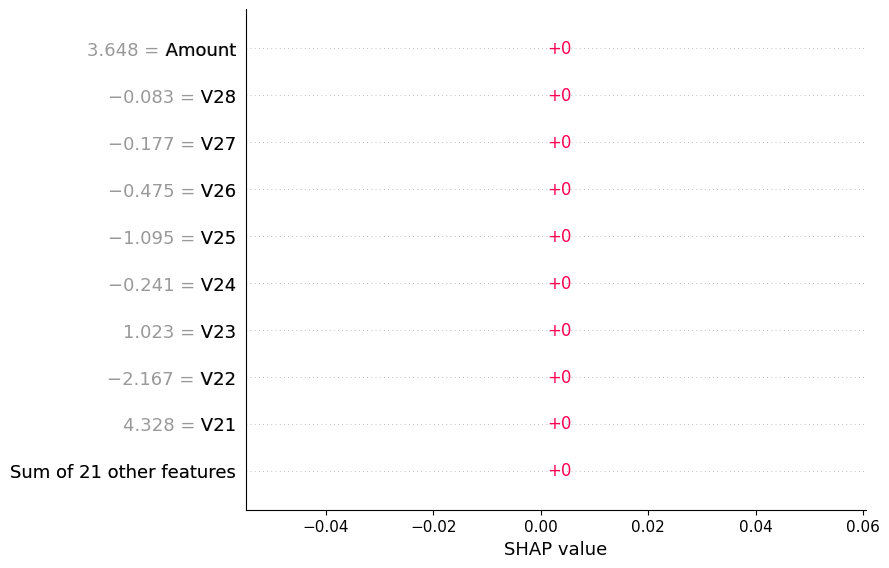

  0%|          | 0/50 [00:00<?, ?it/s]

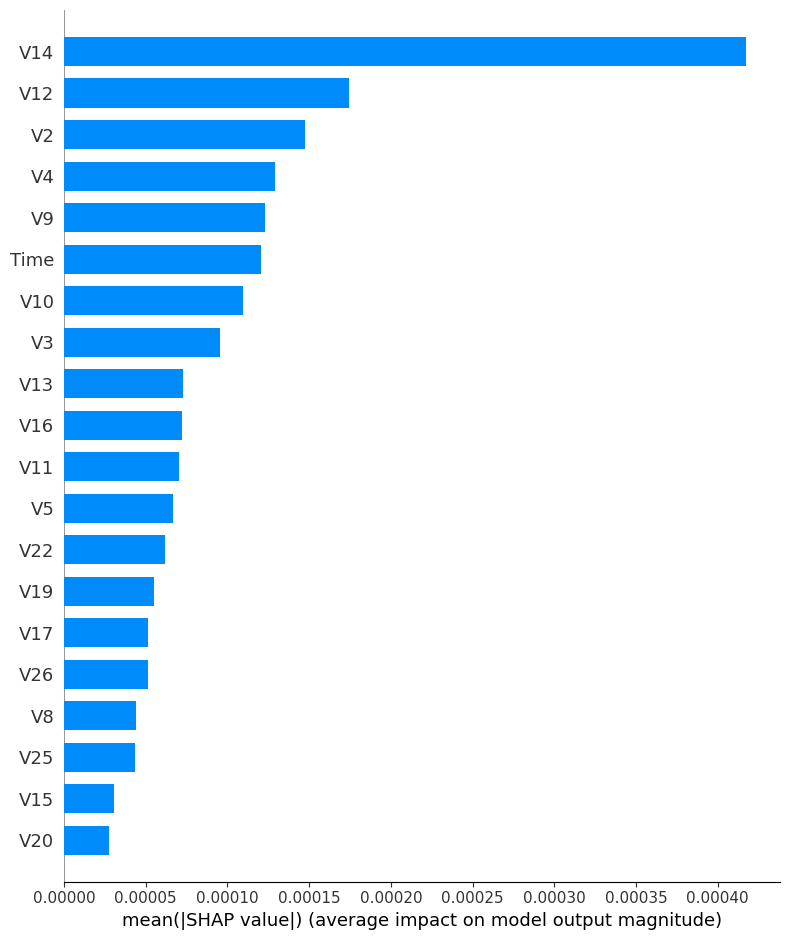

In [2]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# 1️⃣ Load model and scaler
model = joblib.load(r'../Assignment_13/deployment/model.pkl')
scaler = joblib.load(r'../Assignment_13/deployment/scaler.pkl')

# 2️⃣ Load dataset
df = pd.read_csv('creditcard_cleaned.csv')

# Drop unnecessary columns
columns_to_drop = ['TransactionID', 'TransactionDate']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale features
X_scaled = scaler.transform(X)

# 3️⃣ Prediction wrapper for SHAP
def model_predict(X_input):
    return model.predict_proba(X_input)[:, 1]  # only probability of fraud (class 1)

# 4️⃣ Small background dataset to speed up Kernel SHAP
background = X_scaled[:20]
explainer = shap.KernelExplainer(model_predict, background)

# 5️⃣ Explain ONE transaction (first row)
shap_values = explainer.shap_values(X_scaled[0:1])

# 6️⃣ Visualize explanation
shap_expl = shap.Explanation(values=shap_values[0],  # only one array
                             base_values=explainer.expected_value,
                             data=X.iloc[0],
                             feature_names=X.columns)
shap.plots.bar(shap_expl)

# summary for multiple rows
shap_values_all = explainer.shap_values(X_scaled[:50])
shap.summary_plot(shap_values_all, X.iloc[:50], plot_type="bar")